<a href="https://colab.research.google.com/github/everluiz/Machine-learning-class/blob/main/KNN_Formula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L05_data preprocessing and machine learning with Scikit-Learn
**Everton Luiz Pagnoncelli**


abrindo arquivo f1.csv
e imprimindo as 5 primeiras linhas

In [ ]:
import pandas as pd
from datetime import datetime
import time

from google.colab import drive
drive.mount("/content/drive")

df = pd.read_csv('/content/drive/My Drive/f1.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,Time-Q1,Time-Q2,Time-Q3,driver,Pos,Year,Races,Fastest Lap,Grid,Team
0,1,1:25.900,1:25.347,1:24.303,Lewis Hamilton,1.0,2020,Silverstone,1:28.689,1,Mercedes
1,2,1:25.801,1:25.015,1:24.616,Valtteri Bottas,11.0,2020,Silverstone,1:27.097,2,Mercedes
2,3,1:25.513,1:25.840,1:25.099,Lewis Hamilton,1.0,2019,Silverstone,1:27.369,2,Mercedes
3,4,1:25.750,1:25.672,1:25.093,Valtteri Bottas,2.0,2019,Silverstone,1:27.406,1,Mercedes
4,5,1:30.739,1:29.243,1:29.287,Lewis Hamilton,1.0,2016,Silverstone,1:35.771,1,Mercedes


Mapeamento dos nomes das equipes de corrida (classes)

e mapeando os nomes das caracteristicas pilotos e pistas


Eliminação das amostras com valores faltando

In [ ]:
T = {'Mercedes': 0,
     'Red Bull': 1,}

d = {'Lewis Hamilton': 0,
     'Valtteri Bottas': 1,
     'Nico Rosberg': 2,
     'Max Verstappen': 3,
     'Alexander Albon': 4,
     'Pierre Gasly': 5,
     'Daniel Ricciardo': 6}

R = {'Silverstone': 0,
     'Austria': 1,
     'Barcelona': 2,
     'Hungria': 3}
     

df['Team'] = df['Team'].map(T)
df['driver'] = df['driver'].map(d)
df['Races'] = df['Races'].map(R)
df = df.dropna() # Elimina linhas com NaN (valores faltando)
df.head()

,id,Time-Q1,Time-Q2,Time-Q3,driver,Pos,Year,Races,Fastest Lap,Grid,Team
0,1,1:25.900,1:25.347,1:24.303,0.0,1.0,2020,0,1:28.689,1,0
2,3,1:25.513,1:25.840,1:25.099,0.0,1.0,2019,0,1:27.369,2,0
4,5,1:30.739,1:29.243,1:29.287,0.0,1.0,2016,0,1:35.771,1,0
5,6,1:30.724,1:29.970,1:29.606,2.0,3.0,2016,0,1:35.548,2,0
6,7,1:04.198,1:03.096,1:02.951,0.0,4.0,2020,1,1:07.712,2,0


Matriz X com valores das caracteristicas


Vetor Y com os valores das classes

loop for para converter strings do tempo dos pilotos para timestamp (float)

In [ ]:
X = df.iloc[:, 1:10].values
y = df['Team'].values

for i in range(0,len(X[:,])):
    dt = datetime.strptime(X[i,0], "%M:%S.%f")
    X[i,0] = time.mktime(dt.timetuple()) + (dt.microsecond / 1000000.0) # conversão para timestamp
    dt = datetime.strptime(X[i,1], "%M:%S.%f")
    X[i,1] = time.mktime(dt.timetuple()) + (dt.microsecond / 1000000.0) # conversão para timestamp
    dt = datetime.strptime(X[i,2], "%M:%S.%f")
    X[i,2] = time.mktime(dt.timetuple()) + (dt.microsecond / 1000000.0) # conversão para timestamp
    dt = datetime.strptime(X[i,7], "%M:%S.%f")
    X[i,7] = time.mktime(dt.timetuple()) + (dt.microsecond / 1000000.0) # conversão para timestamp
    #print(datetime.utcfromtimestamp(X[4,0]).strftime('%M:%S.%f')) # print do tempo


In [ ]:
print(df)

    id   Time-Q1   Time-Q2   Time-Q3  ...  Races  Fastest Lap  Grid  Team
0    1  1:25.900  1:25.347  1:24.303  ...      0     1:28.689     1     0
2    3  1:25.513  1:25.840  1:25.099  ...      0     1:27.369     2     0
4    5  1:30.739  1:29.243  1:29.287  ...      0     1:35.771     1     0
5    6  1:30.724  1:29.970  1:29.606  ...      0     1:35.548     2     0
6    7  1:04.198  1:03.096  1:02.951  ...      1     1:07.712     2     0
8    9  1:03.818  1:03.803  1:03.262  ...      1     1:08.050     2     0
10  11  1:06.947  1:06.228  1:07.922  ...      1     1:08.411     1     0
11  12  1:06.516  1:06.403  1:08.465  ...      1     1:08.491     2     0
12  13  1:16.872  1:16.013  1:15.584  ...      2     1:19.822     1     0
14  15  1:17.292  1:16.038  1:16.040  ...      2     1:18.492     2     0
18  19  1:14.907  1:14.261  1:13.447  ...      3     1:16.627     1     0
20  21  1:16.068  1:15.548  1:14.769  ...      3     1:18.528     3     0
22  23  1:34.210  1:24.836  1:20.108  

Plotando uma característica contra outra podemos perceber que algumas características como piloto (driver) separam perfeitamente as equipes.

outras são o Grid (posição de largada) e com menos predição Pos (posição de vitória)

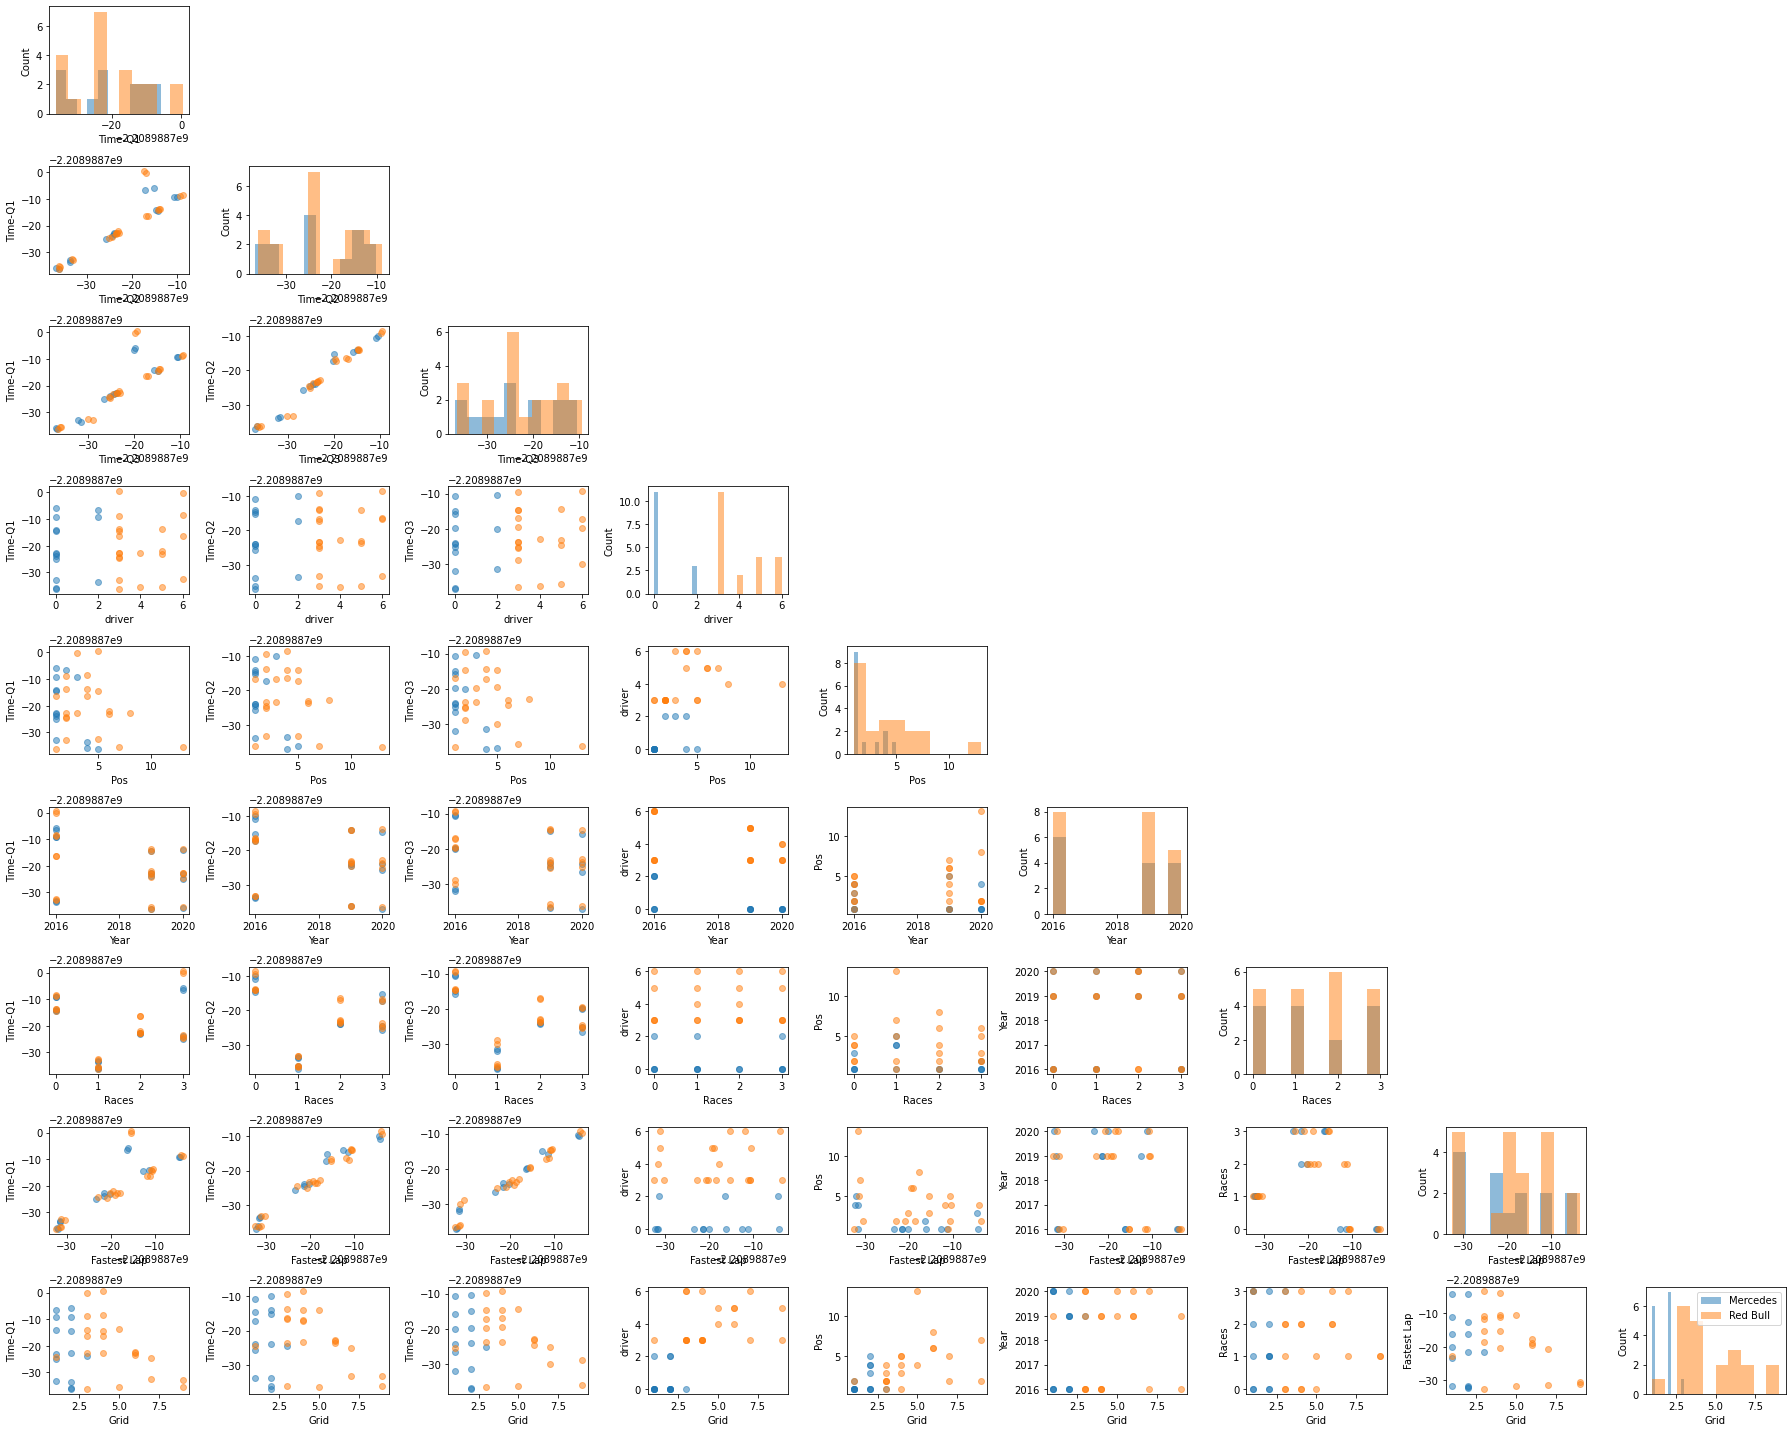

In [ ]:
#!pip install git+git://github.com/rasbt/mlxtend.git
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
names = df.columns[1:10]

fig, axes = scatterplotmatrix(X[y==0], figsize=(25, 20), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==1], fig_axes=(fig, axes), alpha=0.5, names=names)
plt.tight_layout()
plt.legend(labels=['Mercedes','Red Bull'])
plt.show()

dividindo os dados para treino e teste, com 20% das amostras para teste (80% para treino), embaralhando os dados randômicamente e estratificando os grupos de teste e treinamento homogeneamente.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123, stratify=y)
np.bincount(y_train)

array([11, 17])

normalizando os dados usando standartização: (valor - media)/desvioPadrão


gerando vetores de teste e treino com media 0 e desvio padrão 1


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) #calcula media e desvio padrão do grupo de treinamento.
X_train_std = scaler.transform(X_train) #normaliza o vetor de treino
X_test_std = scaler.transform(X_test) #normaliza o vetor de teste
X_train_std

array([[-1.3576382 , -1.47990074, -1.47296607,  1.11816234,  1.27378774,
         0.3592106 , -0.4472136 , -1.31811271,  2.79511686],
       [ 2.10835262,  0.66862934,  0.49997702,  0.16941854,  0.53074489,
        -1.52664507,  1.34164079,  0.47961331,  0.30265597],
       [-0.06313702,  0.00952589,  0.03574803,  1.11816234,  0.90226632,
         0.3592106 ,  0.4472136 ,  0.01019387,  1.29964033],
       [-0.17343429, -0.0524952 , -0.11597975,  1.11816234,  0.90226632,
         0.3592106 ,  1.34164079,  0.06775461,  1.29964033],
       [ 2.06446472,  0.73467781,  0.46656798,  1.59253425, -0.21229796,
        -1.52664507,  1.34164079,  0.47067952, -0.19583621],
       [ 1.26716748,  1.66499404,  1.71343709,  1.59253425,  0.15922347,
        -1.52664507, -1.34164079,  1.76042387,  0.30265597],
       [-0.10577374,  0.03610635,  0.07446389,  0.64379044,  1.64530917,
         0.98782916,  0.4472136 ,  0.19769024,  1.29964033],
       [-1.41480803, -1.50118811, -1.58597788, -1.25369717,  0

Fazendo treinamento usando o classificador Knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=2) # inicia a classe com parâmetro
# de 2 classes
knn_model.fit(X_train_std,y_train) # treinando

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn_model.predict(X_test_std) # testando usando a base de testes (predição)
print(y_pred)
print(y_test)

[0 1 1 0 1 0 1]
[0 1 1 0 0 1 1]


calculando a precisão do modelo classificador:

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7142857142857143

precisão de 71.42%. Possivelmente com uma base de treino maior a precisão poderia ser aumentada.

Treinando novamente com 10% de base de teste e 90% de treino:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=123, stratify=y)

scaler = StandardScaler()
scaler.fit(X_train) #calcula media e desvio padrão do grupo de treinamento.
X_train_std = scaler.transform(X_train) #normaliza o vetor de treino
X_test_std = scaler.transform(X_test) #normaliza o vetor de teste
X_train_std

knn_model = KNeighborsClassifier(n_neighbors=2) # inicia a classe com parâmetro
# de 2 classes
knn_model.fit(X_train_std,y_train) # treinando

y_pred = knn_model.predict(X_test_std) # testando usando a base de testes (predição)
print(y_pred)
print(y_test)

accuracy_score(y_test, y_pred)

[1 0 0 0]
[1 0 1 0]


0.75

Precisão de 75%.

Uma abordagem interessante seria aumentar a base de dados para poder ter um treinamento maior e poder testar o modelo com mais amostras.

Utilizando apenas as características mais fortes para classificar as equipes (driver e Pos ) obtemos precisão de 100%

In [ ]:
X = df.iloc[:, [4,5]].values
y = df['Team'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123, stratify=y)
np.bincount(y_train)

scaler = StandardScaler()
scaler.fit(X_train) #calcula media e desvio padrão do grupo de treinamento.
X_train_std = scaler.transform(X_train) #normaliza o vetor de treino
X_test_std = scaler.transform(X_test) #normaliza o vetor de teste
X_train_std

knn_model = KNeighborsClassifier(n_neighbors=2) # inicia a classe com parâmetro
# de 2 classes
knn_model.fit(X_train_std,y_train) # treinando

y_pred = knn_model.predict(X_test_std) # testando usando a base de testes (predição)
print(y_pred)
print(y_test)

print("Precisão: ",accuracy_score(y_test, y_pred)*100,"%")

[0 1 1 0 0 1 1]
[0 1 1 0 0 1 1]
Precisão:  100.0 %


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


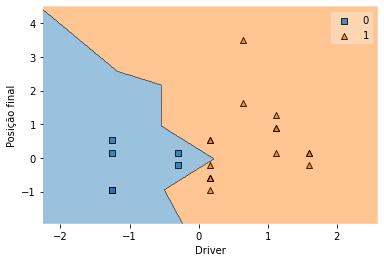

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_std,y_train, knn_model)
plt.xlabel('Driver')
plt.ylabel('Posição final')
plt.show()